## Sprint I - EDA y Limpieza

SPRINT 2 - 9 DE FEBRERO

In [1]:
import pandas as pd
import numpy as np
from datetime import date, datetime

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

/home/sanfermen/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("../datos/bikes.csv", index_col = 0)

### Columnas:

- instant: record index
- dteday : date
- season : season (spring, summer, autumn, winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [3]:
# Ponemos instant, que es el index del alquiler
df = df.set_index("instant")
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## EDA BASICO
Nulos, duplicados, info, describe

In [4]:
df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 91.2+ KB


In [6]:
df.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe(include= "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
dteday,730,730,01-01-2018,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,730,4,autumn,188,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yr,730.0,NaN,NaN,NaN,0.5,0.500343,0.0,0.0,0.5,1.0,1.0
mnth,730.0,NaN,NaN,NaN,6.526027,3.450215,1.0,4.0,7.0,10.0,12.0
holiday,730.0,NaN,NaN,NaN,0.028767,0.167266,0.0,0.0,0.0,0.0,1.0
weekday,730.0,NaN,NaN,NaN,2.99726,2.006161,0.0,1.0,3.0,5.0,6.0
workingday,730.0,NaN,NaN,NaN,0.683562,0.465405,0.0,0.0,1.0,1.0,1.0
weathersit,730.0,NaN,NaN,NaN,1.394521,0.544807,1.0,1.0,1.0,2.0,3.0
temp,730.0,NaN,NaN,NaN,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,NaN,NaN,NaN,23.726322,8.150308,3.95348,16.889713,24.368225,30.445775,42.0448


## CORRECIÓN COLUMNAS
Comprobamos que los datos de algunas columnas no son correctos. Procedemos a corregirlos

### Holiday

### Festivos:

- 01-01 New Years Day January  1 
- 16-01 Martin Luther King’s Birthday January 16 
- 13-02 Lincolns Birthday February 
- 20-02 President’s Day February 20
- 31-03 Cesar Chavez’ Birthday March 31
- 29-05 Memorial Day May 29
- 04-07 Independence Day July 4
- 05-07 Bloody Thursday July 5
- 28-07 Harry Bridges’ Birthday July 28
- 04-09 Labor Day September 4
- 10-11 Veterans’ Day November 10
- 23-11 Thanksgiving Day November 23
- 24-11 Day After Thanksgiving November 24
- 24-12 Christmas Eve December 24
- 25-12 Christmas Day December 25
- 31-12 New Year’s Eve December 31

In [9]:
lista_holiday = ["01-01-2018", "16-01-2018", "20-02-2018", "31-03-2018", "29-05-2018", "04-07-2018", "05-07-2018", "28-07-2018", "04-09-2018", "10-11-2018", "23-11-2018", "24-11-2018", "24-12-2018", "25-12-2018", "31-12-2018", "01-01-2019", "16-01-2019", "20-02-2019", "31-03-2019", "29-05-2019", "04-07-2019", "05-07-2019", "28-07-2019", "04-09-2019", "10-11-2019", "28-11-2019", "29-11-2019", "24-12-2019", "25-12-2019", "31-12-2019"]

In [10]:
df["holiday"] = df["dteday"].isin(lista_holiday)

In [11]:
df.sample(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
185,04-07-2018,autumn,0,7,True,1,0,2,29.793347,33.27085,63.7917,5.459106,3065,2978,6043
472,17-04-2019,summer,1,4,False,2,1,1,24.941653,29.92435,39.0417,18.333143,989,5702,6691
629,21-09-2019,autumn,1,9,False,5,1,1,24.565847,28.59855,66.8750,10.333343,1250,6917,8167
79,20-03-2018,spring,0,3,False,0,0,1,13.632500,16.28750,47.3750,13.917307,1047,1424,2471
14,14-01-2018,spring,0,1,False,5,1,1,6.595670,9.42065,53.7826,8.478716,54,1367,1421


In [12]:
df["holiday"] = np.where(df["holiday"] == False, 0, 1)

In [13]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,spring,0,1,1,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


***

### DATETIME
- Columna **DTEDAY** a datetime
- Función para la columna season

In [14]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,spring,0,1,1,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [15]:
 # Cambiamos la columna dteday a datetime
df.dteday = pd.to_datetime(df.dteday)

In [16]:
df["season"].unique()

array(['spring', 'summer', 'autumn', 'winter'], dtype=object)

In [17]:
# Como las estaciones no coinciden con la fecha, creamos una función para ponerlo bien
def season_of_date(col):
    year= col.year
    seasons = {'spring': pd.date_range(start= '21-03-' + str(year), end= '20-06-' + str(year) ),
               'summer': pd.date_range(start= '21-06-' + str(year), end= '22-09-' + str(year) ),
               'autumn': pd.date_range(start= '23-09-' + str(year), end= '20-12-' + str(year))}
    if col in seasons['spring']:
        return 'spring'
    if col in seasons['summer']:
        return 'summer'
    if col in seasons['autumn']:
        return 'autumn'
    else:
        return 'winter'

In [18]:
# Pasamos la funcion
df["season"] = df["dteday"].apply(season_of_date)

- Columna weekday, la eliminamos y creamos una nueva con dt.dayofweek
- Columna mnth, la sobreescribimos con dt.month

In [19]:
df = df.drop(columns = ["weekday"], axis = 1)

In [20]:
df["weekday"] = df["dteday"].dt.dayofweek 

In [21]:
df.sample(5)

,dteday,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weekday
instant,,,,,,,,,,,,,,,
411,2019-02-15,winter,1,2,0,1,1,14.281653,17.58145,53.1250,12.167200,141,4028,4169,4
476,2019-04-21,spring,1,4,0,0,1,23.370000,27.14605,68.2917,19.000329,2541,4083,6624,6
122,2018-02-05,winter,0,5,0,1,2,22.515847,26.64165,73.0000,12.291418,847,3554,4401,0
671,2019-02-11,winter,1,11,0,1,1,14.555000,17.80210,52.2083,17.833725,618,5229,5847,0
449,2019-03-25,spring,1,3,0,0,2,17.937500,21.87440,88.0833,14.791925,1532,3464,4996,0


In [22]:
# Le sumamos uno para que vayan del 1 al 7, de lunes a domingo
df["weekday"] = df["weekday"] + 1

In [23]:
df["mnth"] = df["dteday"].dt.month

In [24]:

df.head(5)

,dteday,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weekday
instant,,,,,,,,,,,,,,,
1,2018-01-01,winter,0,1,1,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1
2,2018-02-01,winter,0,2,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,4
3,2018-03-01,winter,0,3,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,4
4,2018-04-01,spring,0,4,0,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,7
5,2018-05-01,spring,0,5,0,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2


- Columna workingday. Función para cambiar los valores

In [25]:
def workingday(col1, col2):
    if col1 == 1 or col2 == 6 or col2 == 7:
        return 0
    else:
        return 1

**0: Festivo o fin de semana (no se trabaja).**

**1: Se trabaja.**

In [26]:
df["workingday"] = df.apply(lambda col: workingday(col["holiday"], col["weekday"]), axis = 1)

In [27]:
df.sample(6)

,dteday,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weekday
instant,,,,,,,,,,,,,,,
563,2019-07-17,summer,1,7,0,1,1,33.551653,37.78415,50.5833,7.666743,921,5865,6786,3
203,2018-07-22,summer,0,7,0,0,1,34.781653,42.04480,58.0417,8.917700,562,2825,3387,7
399,2019-03-02,winter,1,3,0,0,1,12.846653,15.46730,52.6667,11.959232,310,3841,4151,6
362,2018-12-28,winter,0,12,0,1,1,12.264330,13.99870,50.3913,19.695387,255,2047,2302,5
386,2019-01-21,winter,1,1,0,1,2,7.106653,8.74375,83.1250,14.917014,67,1234,1301,1
192,2018-11-07,autumn,0,11,0,1,1,31.262500,36.49020,63.5833,18.916579,723,3363,4086,3


### GROUPBY Y UNIQUE

In [28]:
df.groupby(["season"])["registered"].sum()

season
autumn    685299
spring    694701
summer    784770
winter    506123
Name: registered, dtype: int64

In [29]:
df.groupby(["yr"])["registered"].sum()

yr
0     995851
1    1675042
Name: registered, dtype: int64

In [30]:
df["yr"].unique()

array([0, 1])

In [31]:
df["mnth"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [32]:
df["holiday"].unique()

array([1, 0])

In [33]:
df.groupby(["weathersit"])["registered"].sum()

weathersit
1    1811606
2     825313
3      33974
Name: registered, dtype: int64

In [34]:
df.groupby(["mnth"])["registered"].sum()

mnth
1     162161
2     165430
3     211562
4     219291
5     243836
6     253636
7     252535
8     256125
9     262686
10    244987
11    210748
12    187896
Name: registered, dtype: int64

In [35]:
df["weekday"].unique()

array([1, 4, 7, 2, 5, 3, 6])

In [36]:
df["workingday"].unique()

array([0, 1])

In [37]:
df["weathersit"].unique() # No tenemos 4 (tormenta, lluvia fuerte....)

array([2, 1, 3])

In [50]:
df.groupby(["weekday"])["casual"].sum()

weekday
1    122445
2     90505
3     74273
4     67789
5     78282
6     75162
7    111496
Name: casual, dtype: int64

In [49]:
df.groupby(["weekday"])["casual"].median()

weekday
1    987.0
2    830.0
3    687.5
4    647.5
5    665.0
6    615.0
7    782.5
Name: casual, dtype: float64

In [38]:
df.groupby(["weekday"])["registered"].median()

weekday
1    3318.0
2    3348.0
3    3639.5
4    3948.0
5    3849.0
6    3830.5
7    3495.5
Name: registered, dtype: float64

In [39]:
df.groupby(["workingday"])["registered"].sum()

workingday
0     826197
1    1844696
Name: registered, dtype: int64

In [40]:
df.head()

,dteday,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weekday
instant,,,,,,,,,,,,,,,
1,2018-01-01,winter,0,1,1,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1
2,2018-02-01,winter,0,2,0,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,4
3,2018-03-01,winter,0,3,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,4
4,2018-04-01,spring,0,4,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,7
5,2018-05-01,spring,0,5,0,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2


In [41]:
df.sample(6)

,dteday,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weekday
instant,,,,,,,,,,,,,,,
87,2018-03-28,spring,0,3,0,1,1,10.838268,12.87870,30.2174,14.217668,222,1806,2028,3
654,2019-10-16,autumn,1,10,0,1,1,19.201653,23.04230,55.8333,12.208807,922,6612,7534,3
321,2018-11-17,autumn,0,11,0,0,2,14.008347,16.16105,57.5833,20.459254,139,2914,3053,6
148,2018-05-28,spring,0,5,0,1,1,26.889153,30.61895,72.9583,15.416164,2001,2757,4758,1
359,2018-12-25,winter,0,12,1,0,1,11.266103,13.99805,68.1304,10.391097,303,451,754,2
437,2019-03-13,winter,1,3,0,1,1,23.165000,27.14645,61.7500,15.875650,762,5085,5847,3


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    int64         
 4   holiday     730 non-null    int64         
 5   workingday  730 non-null    int64         
 6   weathersit  730 non-null    int64         
 7   temp        730 non-null    float64       
 8   atemp       730 non-null    float64       
 9   hum         730 non-null    float64       
 10  windspeed   730 non-null    float64       
 11  casual      730 non-null    int64         
 12  registered  730 non-null    int64         
 13  cnt         730 non-null    int64         
 14  weekday     730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(9), object(1)
memory usage: 91.2+ 

***
### OUTLIERS

In [43]:
df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt',
       'weekday'],
      dtype='object')

In [44]:
lista_columnas = ["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]

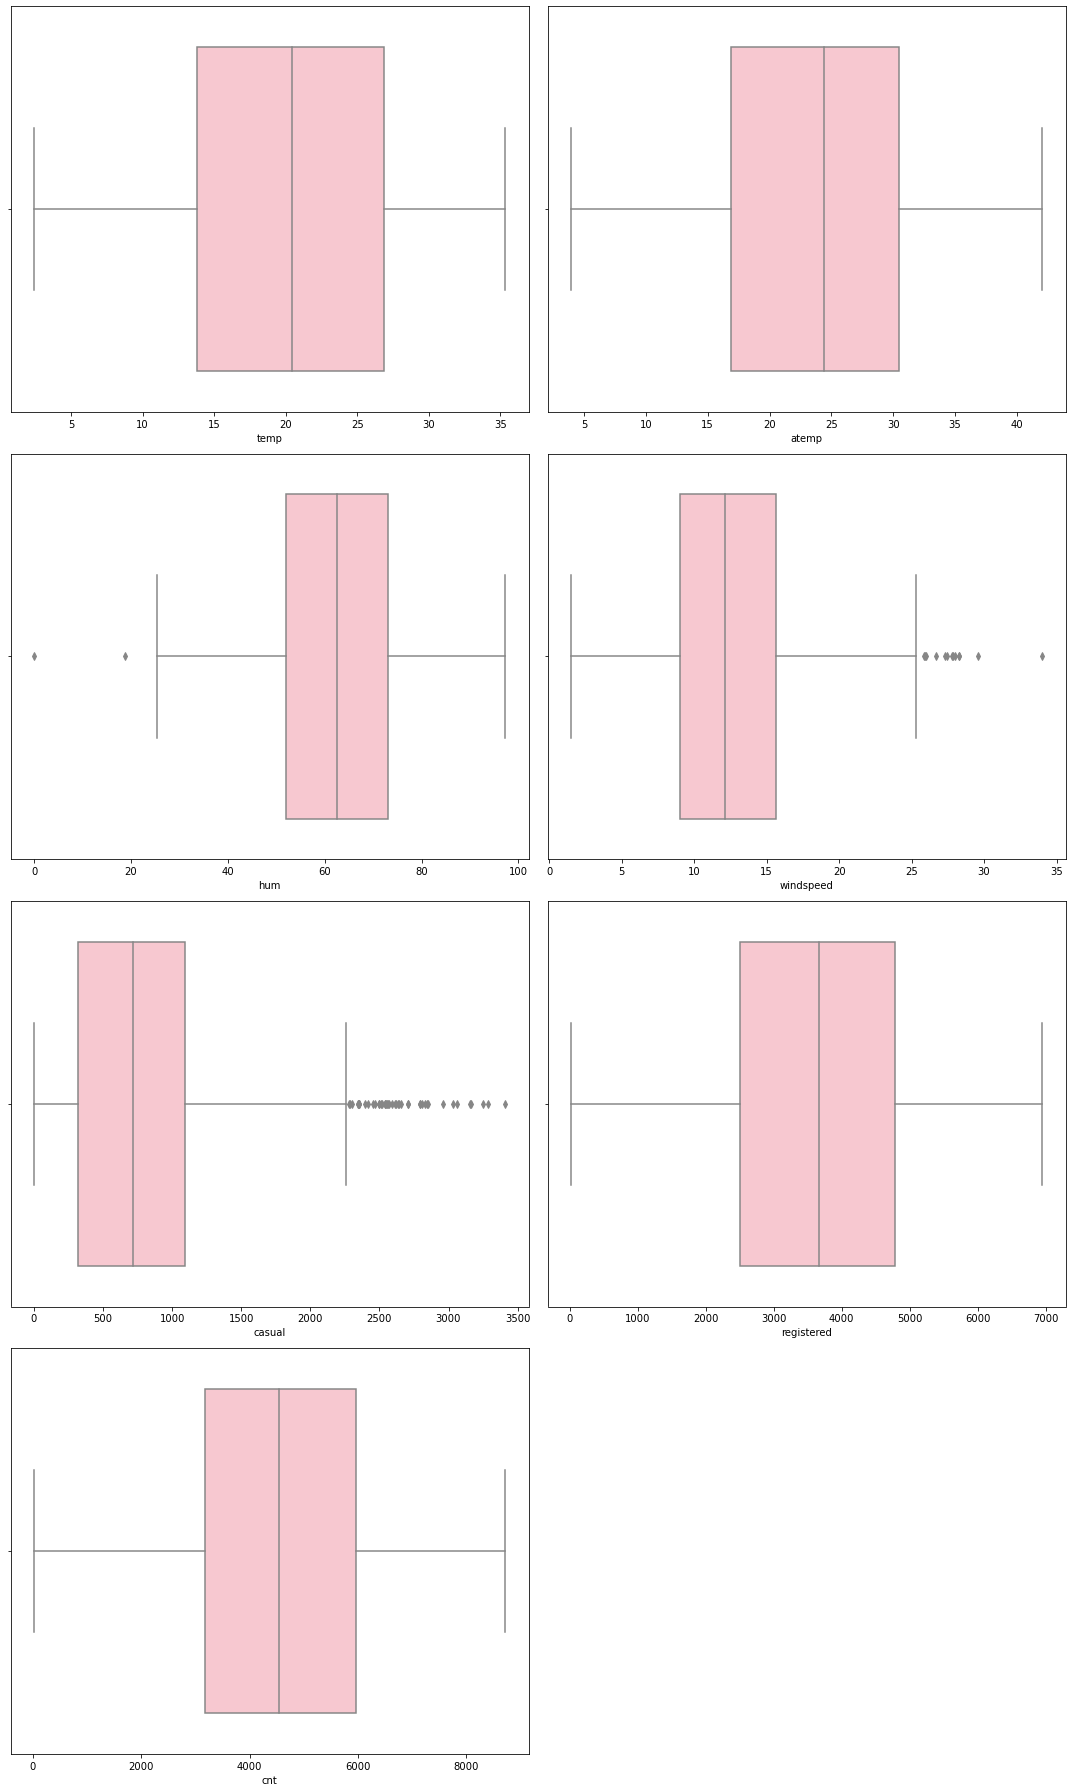

In [45]:
fig, axes = plt.subplots(4, 2, figsize=(15,25))
axes = axes.flat

for i, col in enumerate(lista_columnas):
    sns.boxplot(x = df[col], data = df, ax=axes[i], color = "pink")
fig.delaxes(axes[-1])
plt.tight_layout()
plt.show();

In [51]:
# Función para detectar los outliers
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} 

   
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(dataframe[col], 25)
        Q3 = np.nanpercentile(dataframe[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        
    return dicc_indices

In [46]:
df.drop(columns=["dteday"], inplace=True, axis=1)

In [52]:
index_price = detectar_outliers(["hum", "windspeed"], df)

In [54]:
index_price

{'hum': [50, 69],
 'windspeed': [45, 50, 94, 95, 293, 383, 408, 421, 432, 433, 450, 666, 721]}

In [53]:
# Creamos una copia para quitar los outliers
df2 = df.copy()
df2.head()

,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weekday
instant,,,,,,,,,,,,,,
1,winter,0,1,1,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1
2,winter,0,2,0,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,4
3,winter,0,3,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,4
4,spring,0,4,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,7
5,spring,0,5,0,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2


In [55]:
lista_hum = index_price["hum"]
lista_windspeed = index_price["windspeed"]

In [62]:
lista_indices = list(set(lista_windspeed+lista_hum))

In [63]:
lista_indices

[450, 293, 421, 383, 69, 45, 432, 433, 50, 721, 408, 666, 94, 95]

In [65]:
df2.drop(lista_indices, axis=0, inplace= True)
df2.shape

(716, 14)

- Nos quedamos con los usuarios registrados porque presentan menos número de outliers y es más fácil trabajar con estos datos.

In [47]:
df.to_csv("../datos/bikes_clean.csv")

In [48]:
df.tail()

,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weekday
instant,,,,,,,,,,,,,,
726,winter,1,12,0,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114,5
727,winter,1,12,0,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095,6
728,winter,1,12,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341,7
729,winter,1,12,0,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796,1
730,winter,1,12,1,0,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729,2


In [ ]:
df2.to_csv("../datos/")